In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px
import pandas as pd
import geojsonio
import folium
import shapely

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [4]:
data = pd.read_csv('C:/Users/gianl/Capstone/Mangiapane_Gianluca_PythonPredictor/raw_data/PythonSightings.csv')
data.head()

objectid                              reporter        RecOwner  \
0     97627    Skip Snow Everglades National Park  General Public   
1    145991    Skip Snow Everglades National Park  General Public   
2    414849    Skip Snow Everglades National Park  General Public   
3    446320  Michael Renda The Nature Conservancy  General Public   
4    462630       Jeffrey Carter Rookery Bay NERR  General Public   

                          SciName         ComName    Nativity OccStatus  \
0  Python molurus ssp. bivittatus  Burmese python  Introduced  Detected   
1  Python molurus ssp. bivittatus  Burmese python  Introduced  Detected   
2  Python molurus ssp. bivittatus  Burmese python  Introduced  Detected   
3  Python molurus ssp. bivittatus  Burmese python  Introduced  Detected   
4  Python molurus ssp. bivittatus  Burmese python  Introduced  Detected   

     Status     ObsDate     DateEnt  ... TreatComm  \
0  Positive   5/20/2008   5/23/2008  ...       NaN   
1  Positive   6/24/2008   6/30/2008  ...       NaN   
2  Positive   12/1/2008   12/3/2008  ...       NaN   
3  Positive  10/15/2008    3/7/2010  ...       NaN   
4  Positive  12/27/2008  12/30/2008  ...       NaN   

                                           Reference  \
0  "Skip Snow, National Park Service, personal co...   
1  "Skip Snow, National Park Service, personal co...   
2  "Skip Snow, National Park Service, personal co...   
3  "Michael Renda, The Nature Conservancy, person...   
4  "Jeffrey Carter, Rookery Bay National Estuarin...   

                                            Locality  \
0          "Everglades National Park, Paurotis Pond"   
1  "Key Largo, vicinity of Overseas Highway and F...   
2  "Spruce Creek, Kendrew Dr appx 130 m N of Bogg...   
3      "Jupiter, Sierra Square 9250 W Indiantown Rd"   
4  "Collier County, Hyw 951 appx 200m S of Shell ...   

                                            Comments ReviewDate Reviewer  \
0  "Matt Brien, University of Florida, stopped by...        NaN      NaN   
1  "At about 1:10 pm on Tuesday, 24 June 2008, th...        NaN      NaN   
2  "Observed on a forested private lot behind a r...        NaN      NaN   
3  "I did not observe this, but spoke to the anim...        NaN      NaN   
4                                                NaN        NaN      NaN   

            VerifyMthd  Verified    IDCred  ReviewComm  
0  Voucher Photographs  Verified  Verified         NaN  
1    Voucher Specimens  Verified  Verified         NaN  
2                  NaN  Verified  Credible         NaN  
3            Specimens  Verified  Verified         NaN  
4  Voucher Photographs  Verified  Verified         NaN  

[5 rows x 79 columns]

In [5]:
data.shape

(7591, 79)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 79 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   objectid    7591 non-null   int64  
 1   reporter    7591 non-null   object 
 2   RecOwner    7591 non-null   object 
 3   SciName     7591 non-null   object 
 4   ComName     7591 non-null   object 
 5   Nativity    7591 non-null   object 
 6   OccStatus   7591 non-null   object 
 7   Status      7591 non-null   object 
 8   ObsDate     7591 non-null   object 
 9   DateEnt     7591 non-null   object 
 10  DateUp      1296 non-null   object 
 11  Location    7591 non-null   object 
 12  Latitude    7217 non-null   float64
 13  Longitude   7217 non-null   float64
 14  Datum       7366 non-null   object 
 15  Method      2238 non-null   object 
 16  CoordAcc    354 non-null    float64
 17  DataType    0 non-null      float64
 18  Centroid    2 non-null      object 
 19  Abundance   0 non-null     

In [7]:
data.describe()

objectid     Latitude    Longitude     CoordAcc  DataType  \
count  7.591000e+03  7217.000000  7217.000000   354.000000       0.0   
mean   6.180052e+06    25.712894   -80.753467    74.022599       NaN   
std    2.603699e+06     0.396374     0.334420   339.335018       NaN   
min    9.762700e+04    24.563570   -85.854980     0.000000       NaN   
25%    3.069136e+06    25.442160   -80.852500     0.000000       NaN   
50%    7.841511e+06    25.761140   -80.682530     5.000000       NaN   
75%    8.371104e+06    25.866180   -80.542490    10.000000       NaN   
max    1.016516e+07    31.028900   -80.100400  4000.000000       NaN   

       Abundance    InfestAcre     GrossAcre  Density    Quantity  ...  \
count        0.0    161.000000     70.000000      0.0  215.000000  ...   
mean         NaN    980.181553    738.473429      NaN    1.469767  ...   
std          NaN   8665.516370   3611.870906      NaN    6.767001  ...   
min          NaN      0.000000      0.000000      NaN    0.000000  ...   
25%          NaN      0.000000      0.000000      NaN    1.000000  ...   
50%          NaN      0.000000      0.000000      NaN    1.000000  ...   
75%          NaN      0.000000      1.000000      NaN    1.000000  ...   
max          NaN  78000.000000  25000.000000      NaN  100.000000  ...   

       TargetName  TargetCnt  TargetRnge  Sex  PID  WaterName  WaterType  \
count         0.0        0.0         0.0  0.0  0.0        0.0        0.0   
mean          NaN        NaN         NaN  NaN  NaN        NaN        NaN   
std           NaN        NaN         NaN  NaN  NaN        NaN        NaN   
min           NaN        NaN         NaN  NaN  NaN        NaN        NaN   
25%           NaN        NaN         NaN  NaN  NaN        NaN        NaN   
50%           NaN        NaN         NaN  NaN  NaN        NaN        NaN   
75%           NaN        NaN         NaN  NaN  NaN        NaN        NaN   
max           NaN        NaN         NaN  NaN  NaN        NaN        NaN   

       Substrate  TreatArea  PlantTreat  
count        0.0        0.0         0.0  
mean         NaN        NaN         NaN  
std          NaN        NaN         NaN  
min          NaN        NaN         NaN  
25%          NaN        NaN         NaN  
50%          NaN        NaN         NaN  
75%          NaN        NaN         NaN  
max          NaN        NaN         NaN  

[8 rows x 33 columns]

In [8]:
data_dropped = data.dropna(subset=['Latitude', 'Longitude'])

data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7217 entries, 0 to 7590
Data columns (total 79 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   objectid    7217 non-null   int64  
 1   reporter    7217 non-null   object 
 2   RecOwner    7217 non-null   object 
 3   SciName     7217 non-null   object 
 4   ComName     7217 non-null   object 
 5   Nativity    7217 non-null   object 
 6   OccStatus   7217 non-null   object 
 7   Status      7217 non-null   object 
 8   ObsDate     7217 non-null   object 
 9   DateEnt     7217 non-null   object 
 10  DateUp      1278 non-null   object 
 11  Location    7217 non-null   object 
 12  Latitude    7217 non-null   float64
 13  Longitude   7217 non-null   float64
 14  Datum       7217 non-null   object 
 15  Method      2238 non-null   object 
 16  CoordAcc    354 non-null    float64
 17  DataType    0 non-null      float64
 18  Centroid    2 non-null      object 
 19  Abundance   0 non-null     

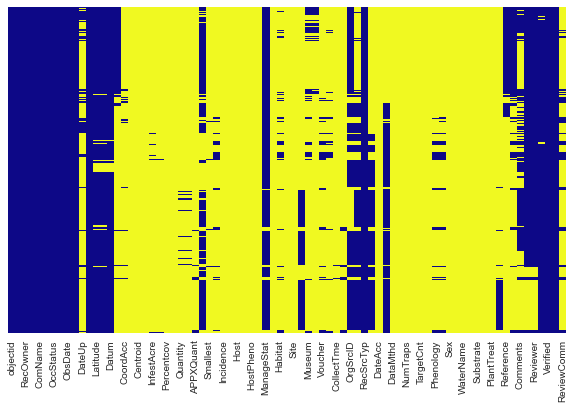

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='plasma')
plt.show()

In [10]:
fig = px.scatter_geo(data, lat='Latitude', lon='Longitude', hover_name="ObsDate")
fig.update_layout(title = 'Python Sightings in Florida', title_x=0.5)
fig.show()

In [11]:
tile_url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}'
attr = 'Tiles &copy; Esri &mdash; Source: Esri, DeLorme, NAVTEQ, USGS, Intermap, iPC, NRCAN, Esri Japan, METI, Esri China (Hong Kong), Esri (Thailand), TomTom, 2012'

In [12]:
zipcodes = gpd.read_file('raw_data/fl_florida_zip_codes_geo.min.json')
zipcodes = zipcodes.to_crs(epsg=4326)

zipcodes

STATEFP10 ZCTA5CE10  GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  \
0          12     32606  1232606        B5   G6350          S   44273265   
1          12     32609  1232609        B5   G6350          S  290843169   
2          12     32612  1232612        B5   G6350          S    2117657   
3          12     32234  1232234        B5   G6350          S  335454814   
4          12     32438  1232438        B5   G6350          S  162751694   
..        ...       ...      ...       ...     ...        ...        ...   
978        12     32129  1232129        B5   G6350          S   19276444   
979        12     32168  1232168        B5   G6350          S  424964754   
980        12     32738  1232738        B5   G6350          S   66976215   
981        12     32141  1232141        B5   G6350          S   60921307   
982        12     32459  1232459        B5   G6350          S  141718481   

     AWATER10   INTPTLAT10    INTPTLON10 PARTFLG10  \
0      253128  +29.6820042  -082.4440962         N   
1     6376578  +29.7689903  -082.2825337         N   
2      310044  +29.6431195  -082.3538453         N   
3     1292362  +30.2260009  -081.9835221         N   
4      964947  +30.5012874  -085.4240809         N   
..        ...          ...           ...       ...   
978    651408  +29.1369736  -081.0239569         N   
979   5791624  +28.9637734  -081.0294134         N   
980   8358124  +28.9052691  -081.1851759         N   
981   2134685  +28.9289532  -080.9191350         N   
982  40145065  +30.3606681  -086.1855320         N   

                                              geometry  
0    POLYGON ((-82.37990 29.67955, -82.38003 29.679...  
1    MULTIPOLYGON (((-82.35105 29.72611, -82.35094 ...  
2    MULTIPOLYGON (((-82.35040 29.64489, -82.35040 ...  
3    POLYGON ((-82.03100 30.14228, -82.03132 30.142...  
4    POLYGON ((-85.35526 30.53367, -85.35410 30.533...  
..                                                 ...  
978  POLYGON ((-80.99360 29.15030, -80.99358 29.149...  
979  POLYGON ((-81.02429 28.87645, -81.02489 28.876...  
980  POLYGON ((-81.21764 28.89041, -81.21749 28.890...  
981  POLYGON ((-80.91498 28.96535, -80.91481 28.965...  
982  POLYGON ((-86.32452 30.37290, -86.32450 30.373...  

[983 rows x 12 columns]

In [13]:
zipcodes.to_file('file.shp')

In [14]:
zipcodes.head()

STATEFP10 ZCTA5CE10  GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  \
0        12     32606  1232606        B5   G6350          S   44273265   
1        12     32609  1232609        B5   G6350          S  290843169   
2        12     32612  1232612        B5   G6350          S    2117657   
3        12     32234  1232234        B5   G6350          S  335454814   
4        12     32438  1232438        B5   G6350          S  162751694   

   AWATER10   INTPTLAT10    INTPTLON10 PARTFLG10  \
0    253128  +29.6820042  -082.4440962         N   
1   6376578  +29.7689903  -082.2825337         N   
2    310044  +29.6431195  -082.3538453         N   
3   1292362  +30.2260009  -081.9835221         N   
4    964947  +30.5012874  -085.4240809         N   

                                            geometry  
0  POLYGON ((-82.37990 29.67955, -82.38003 29.679...  
1  MULTIPOLYGON (((-82.35105 29.72611, -82.35094 ...  
2  MULTIPOLYGON (((-82.35040 29.64489, -82.35040 ...  
3  POLYGON ((-82.03100 30.14228, -82.03132 30.142...  
4  POLYGON ((-85.35526 30.53367, -85.35410 30.533...

In [15]:
m = folium.Map(
    location=[25.798304640999145, -80.54200377829113],
    zoom_start=11,
    tiles=tile_url,
    attr=attr
)

m

In [16]:
m.crs

'EPSG3857'

In [17]:
from shapely.geometry import Point

In [18]:
geodata = gpd.GeoDataFrame(
data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

In [19]:
geodata.set_crs(epsg=3857, inplace=True)

objectid                                           reporter  \
0        97627                 Skip Snow Everglades National Park   
1       145991                 Skip Snow Everglades National Park   
2       414849                 Skip Snow Everglades National Park   
3       446320               Michael Renda The Nature Conservancy   
4       462630                    Jeffrey Carter Rookery Bay NERR   
...        ...                                                ...   
7586  10163321  Melissa Ferral Crocodile Lake National Wildlif...   
7587  10163500  Amy Peters South Florida Water Management Dist...   
7588  10163534  Amy Peters South Florida Water Management Dist...   
7589  10163602                                          Bob gore    
7590  10165156  Colleen Closius Florida Fish and Wildlife Cons...   

            RecOwner                         SciName         ComName  \
0     General Public  Python molurus ssp. bivittatus  Burmese python   
1     General Public  Python molurus ssp. bivittatus  Burmese python   
2     General Public  Python molurus ssp. bivittatus  Burmese python   
3     General Public  Python molurus ssp. bivittatus  Burmese python   
4     General Public  Python molurus ssp. bivittatus  Burmese python   
...              ...                             ...             ...   
7586         Unknown  Python molurus ssp. bivittatus  Burmese python   
7587         Unknown  Python molurus ssp. bivittatus  Burmese python   
7588         Unknown  Python molurus ssp. bivittatus  Burmese python   
7589         Unknown  Python molurus ssp. bivittatus  Burmese python   
7590         Unknown  Python molurus ssp. bivittatus  Burmese python   

        Nativity OccStatus    Status     ObsDate     DateEnt  ...  \
0     Introduced  Detected  Positive   5/20/2008   5/23/2008  ...   
1     Introduced  Detected  Positive   6/24/2008   6/30/2008  ...   
2     Introduced  Detected  Positive   12/1/2008   12/3/2008  ...   
3     Introduced  Detected  Positive  10/15/2008    3/7/2010  ...   
4     Introduced  Detected  Positive  12/27/2008  12/30/2008  ...   
...          ...       ...       ...         ...         ...  ...   
7586  Introduced  Detected  Positive    1/8/2022   1/12/2022  ...   
7587  Introduced  Detected  Positive    1/8/2022   1/13/2022  ...   
7588  Introduced  Detected  Positive   1/13/2022   1/14/2022  ...   
7589  Introduced  Detected  Positive   1/17/2022   1/17/2022  ...   
7590  Introduced  Detected  Positive   1/20/2022   1/20/2022  ...   

                                              Reference  \
0     "Skip Snow, National Park Service, personal co...   
1     "Skip Snow, National Park Service, personal co...   
2     "Skip Snow, National Park Service, personal co...   
3     "Michael Renda, The Nature Conservancy, person...   
4     "Jeffrey Carter, Rookery Bay National Estuarin...   
...                                                 ...   
7586                                                NaN   
7587                                                NaN   
7588                                                NaN   
7589                                                NaN   
7590                                                NaN   

                                               Locality  \
0             "Everglades National Park, Paurotis Pond"   
1     "Key Largo, vicinity of Overseas Highway and F...   
2     "Spruce Creek, Kendrew Dr appx 130 m N of Bogg...   
3         "Jupiter, Sierra Square 9250 W Indiantown Rd"   
4     "Collier County, Hyw 951 appx 200m S of Shell ...   
...                                                 ...   
7586  "Burmese python found dead on Cardsound Toll R...   
7587  "Jason Huckabee found a found python at C139 a...   
7588  "Hi Mike and Ed, \nI received a report this mo...   
7589                                                NaN   
7590  "Laying in the road just before the Harold Cam...   

                                               Comments  ReviewDa

In [20]:
geodata.shape

(7591, 80)

In [21]:
geodata.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

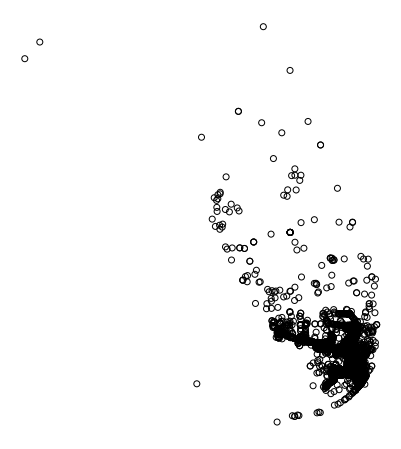

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = geodata.plot(ax=ax, facecolor='none', edgecolor='black')
ax.set_axis_off()
ax.set_aspect("equal")

<AxesSubplot:>

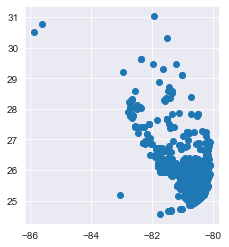

In [23]:
geodata.plot()

<AxesSubplot:>

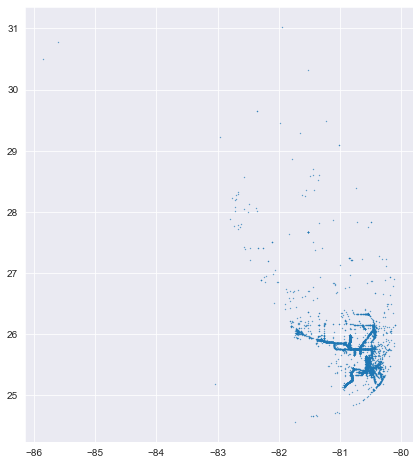

In [24]:
geodata.plot(markersize=.1, figsize=(8,8))

<AxesSubplot:>

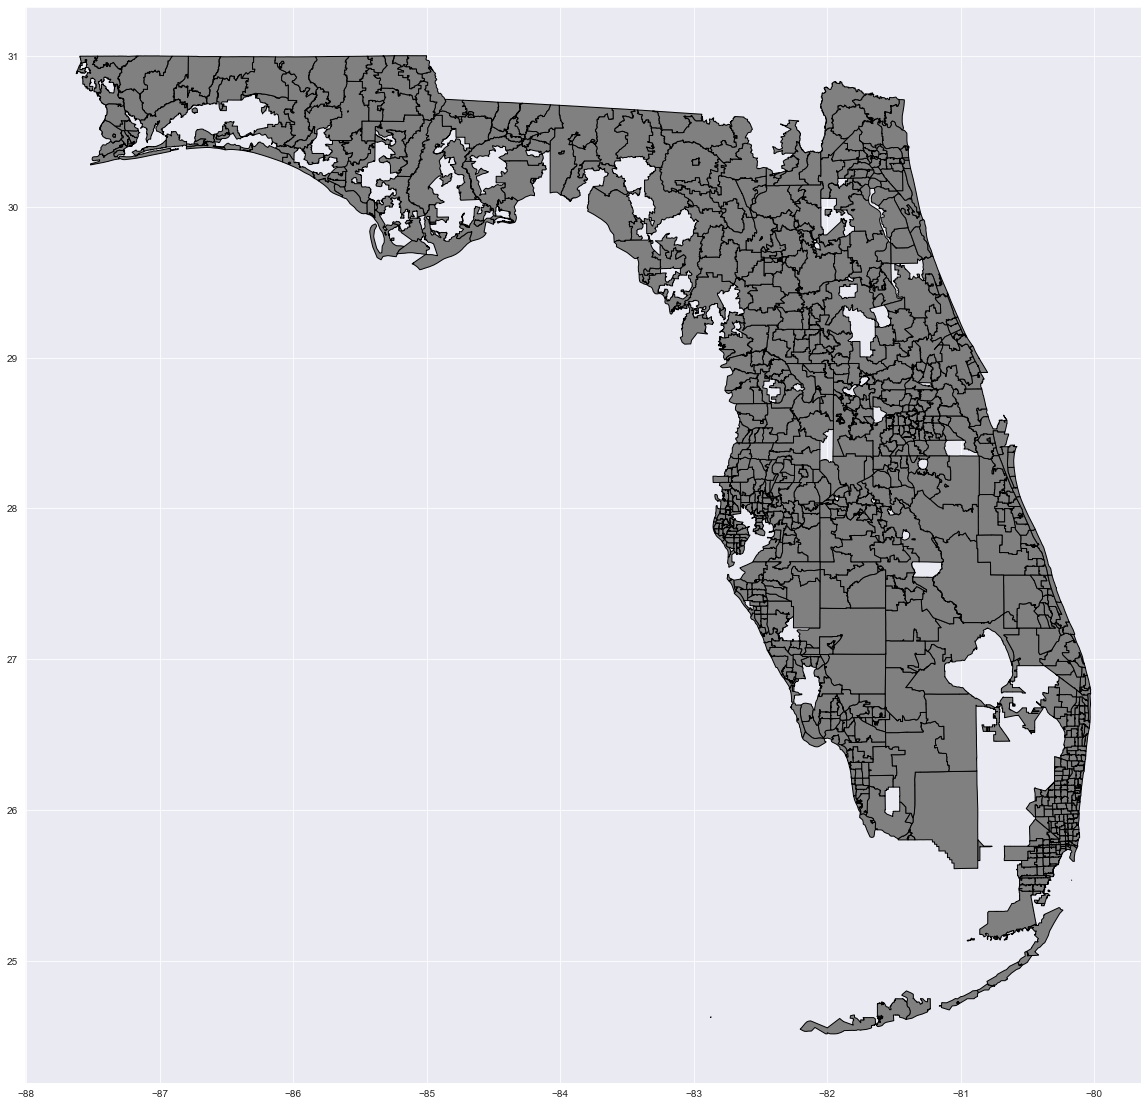

In [25]:
fig, ax = plt.subplots(figsize=(20,20))

zipcodes.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1)

In [26]:
# total area for the grid
xmin, ymin, xmax, ymax= geodata.total_bounds
# how many cells across and down
n_cells=80
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = 3857
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

In [27]:
counties = gpd.read_file('raw_data/geojson-fl-counties-fips.json')
counties = counties.to_crs(epsg=4326)

counties

id          GEO_ID STATE COUNTY       NAME    LSAD  CENSUSAREA  \
0   12083  0500000US12083    12    083     Marion  County    1584.546   
1   12087  0500000US12087    12    087     Monroe  County     983.282   
2   12095  0500000US12095    12    095     Orange  County     903.429   
3   12111  0500000US12111    12    111  St. Lucie  County     571.926   
4   12119  0500000US12119    12    119     Sumter  County     546.933   
..    ...             ...   ...    ...        ...     ...         ...   
62  12065  0500000US12065    12    065  Jefferson  County     598.095   
63  12009  0500000US12009    12    009    Brevard  County    1015.664   
64  12075  0500000US12075    12    075       Levy  County    1118.206   
65  12021  0500000US12021    12    021    Collier  County    1998.324   
66  12033  0500000US12033    12    033   Escambia  County     656.461   

                                             geometry  
0   POLYGON ((-82.31170 28.96039, -82.42700 29.021...  
1   MULTIPOLYGON (((-80.25058 25.34193, -80.25492 ...  
2   POLYGON ((-81.65739 28.55312, -81.65811 28.682...  
3   POLYGON ((-80.67786 27.20599, -80.67861 27.448...  
4   POLYGON ((-81.95419 28.96005, -81.95358 28.820...  
..                                                ...  
62  POLYGON ((-84.00739 30.67210, -83.88032 30.665...  
63  POLYGON ((-80.63131 28.65519, -80.61679 28.634...  
64  POLYGON ((-82.40515 29.33026, -82.40459 29.278...  
65  POLYGON ((-81.56376 26.51332, -81.27177 26.517...  
66  POLYGON ((-86.91929 30.37067, -87.15539 30.327...  

[67 rows x 8 columns]

In [28]:
counties.to_file('file.shp')

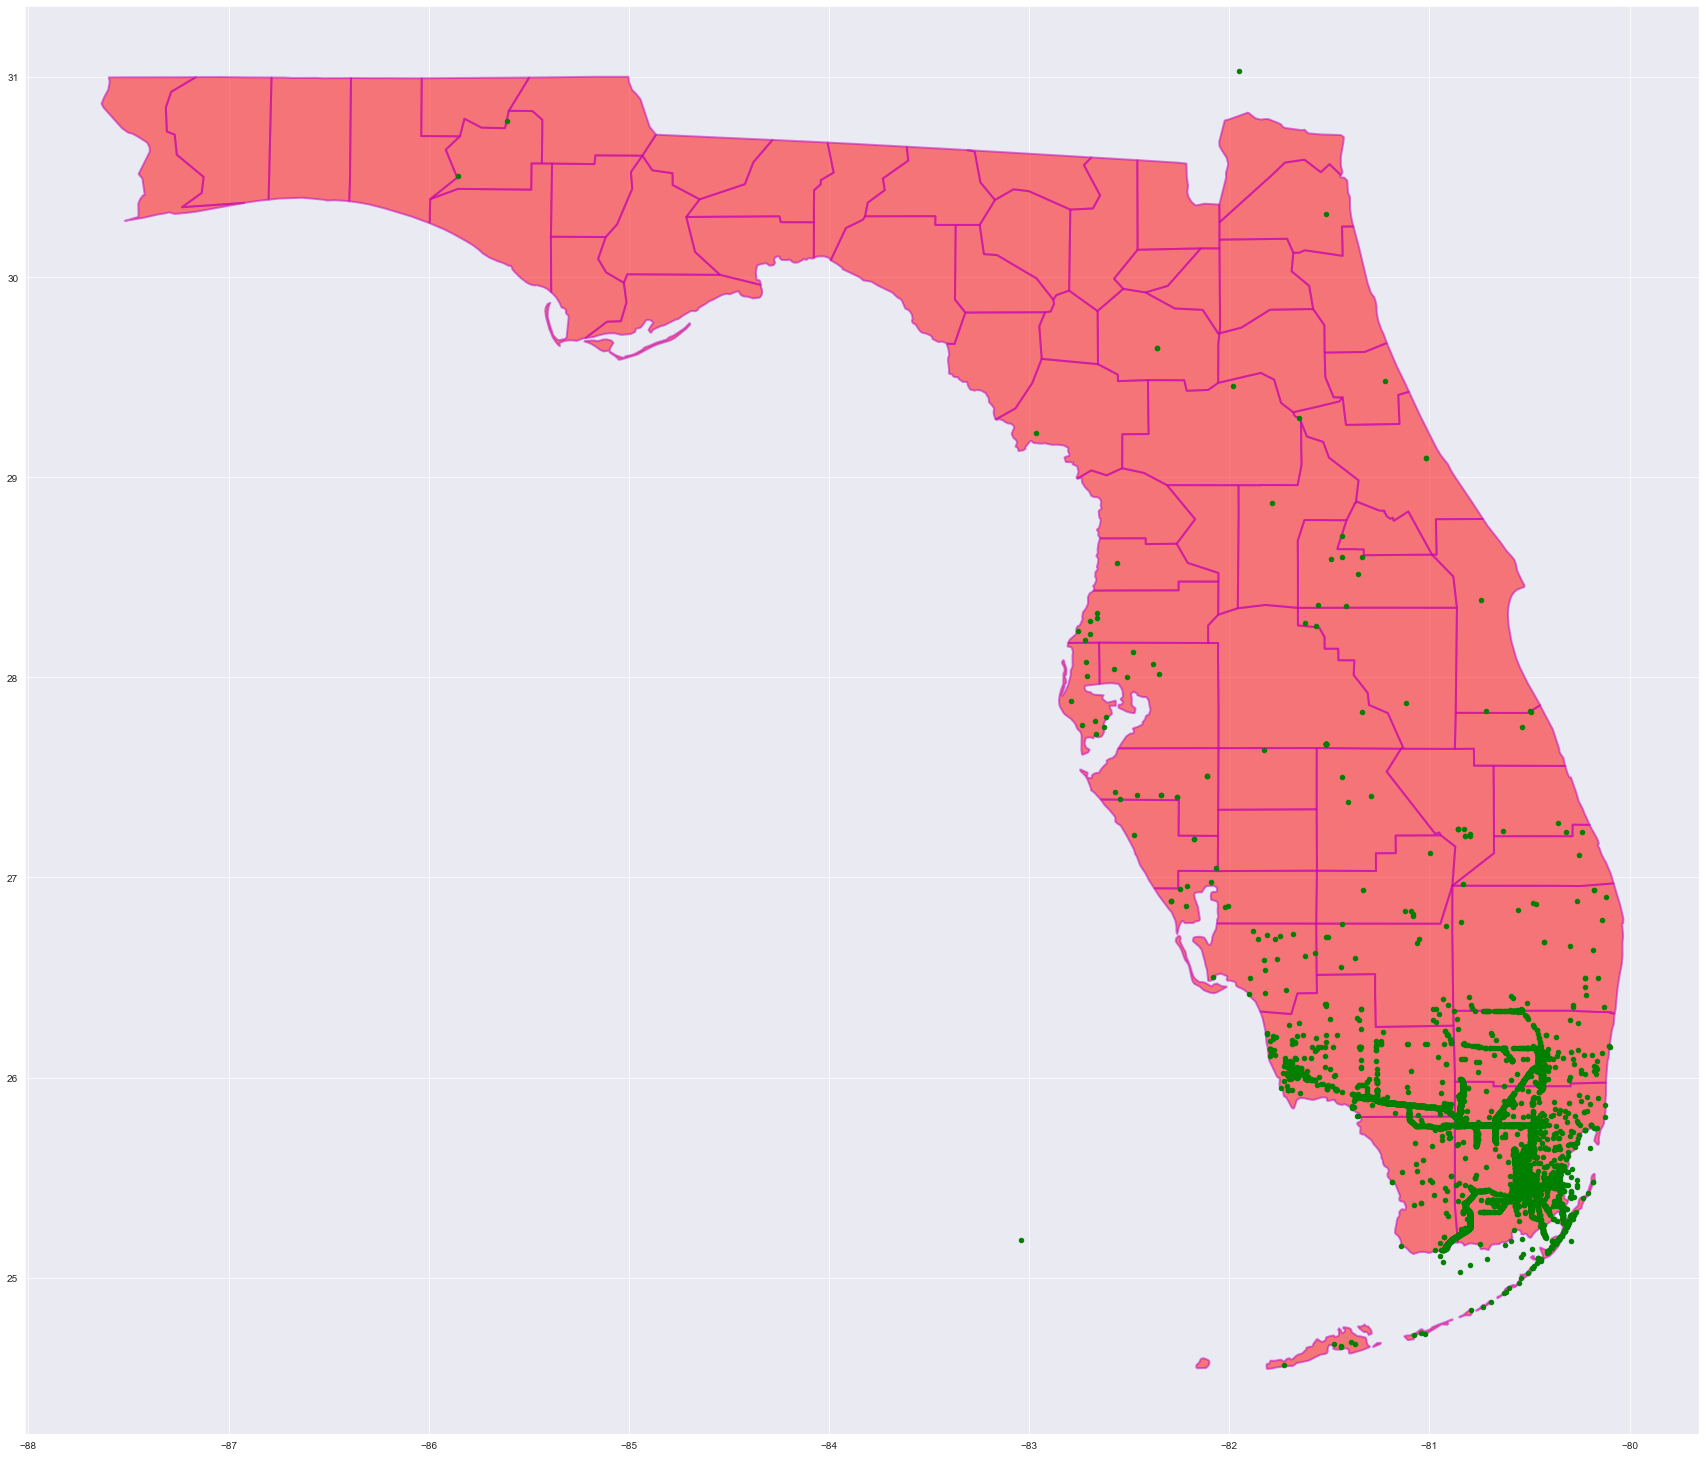

In [29]:
fig, ax = plt.subplots(figsize=(30,30))

counties.plot(ax=ax, facecolor='red', edgecolor='m',alpha=.5,linewidth=2)


geodata.plot(ax=ax, color='green', markersize=20);



In [33]:
geodata['ObsDate'] = pd.to_datetime(geodata['ObsDate'], format='%m/%d/%Y')

In [37]:
pre2000 = geodata.loc[(geodata['ObsDate'] >= '01/01/1979')
                     & (geodata['ObsDate'] < '01/01/2000')]

pre2000.shape

(13, 80)

In [36]:
fig, ax = plt.subplots(figsize=(30,30))

counties.plot(ax=ax, facecolor='red', edgecolor='m',alpha=.5,linewidth=2)


pre2000.plot(ax=ax, color='green', markersize=20);


In [38]:
pre2005 = geodata.loc[(geodata['ObsDate'] >= '01/01/1979')
                     & (geodata['ObsDate'] < '01/01/2005')]

pre2005.shape

(196, 80)

In [40]:
fig, ax = plt.subplots(figsize=(30,30))

counties.plot(ax=ax, facecolor='red', edgecolor='m',alpha=.5,linewidth=2)


pre2005.plot(ax=ax, color='green', markersize=20);

In [43]:
pre2010 = geodata.loc[(geodata['ObsDate'] >= '01/01/1979')
                     & (geodata['ObsDate'] < '01/01/2010')]

pre2010.shape

fig, ax = plt.subplots(figsize=(30,30))

counties.plot(ax=ax, facecolor='red', edgecolor='m',alpha=.5,linewidth=2)


pre2010.plot(ax=ax, color='green', markersize=20);

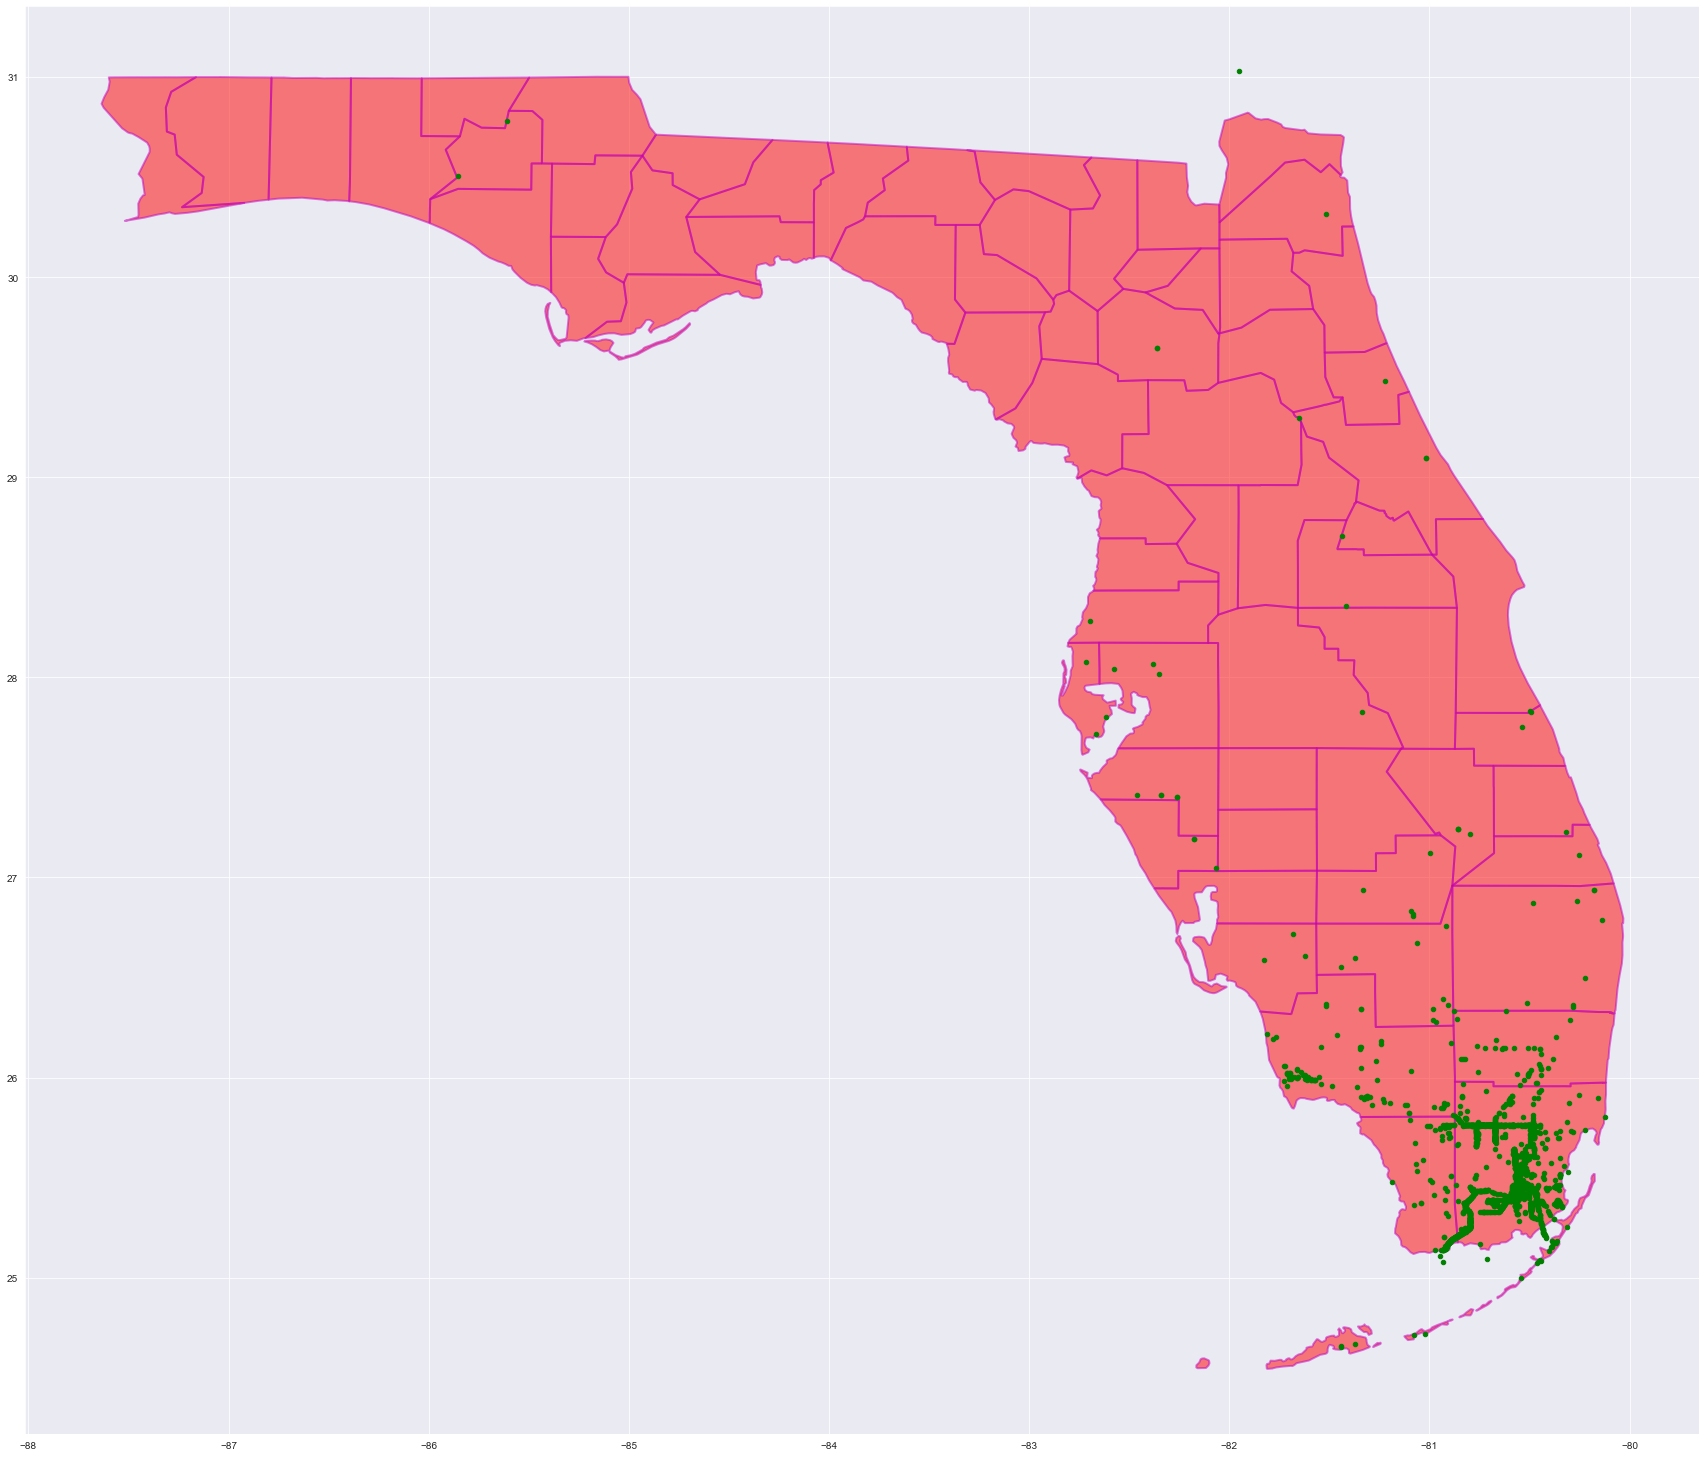

In [44]:
pre2015 = geodata.loc[(geodata['ObsDate'] >= '01/01/1979')
                     & (geodata['ObsDate'] < '01/01/2015')]

pre2010.shape

fig, ax = plt.subplots(figsize=(30,30))

counties.plot(ax=ax, facecolor='red', edgecolor='m',alpha=.5,linewidth=2)


pre2015.plot(ax=ax, color='green', markersize=20);

In [45]:
pre2010.shape

(1161, 80)

In [46]:
pre2015.shape

(2279, 80)

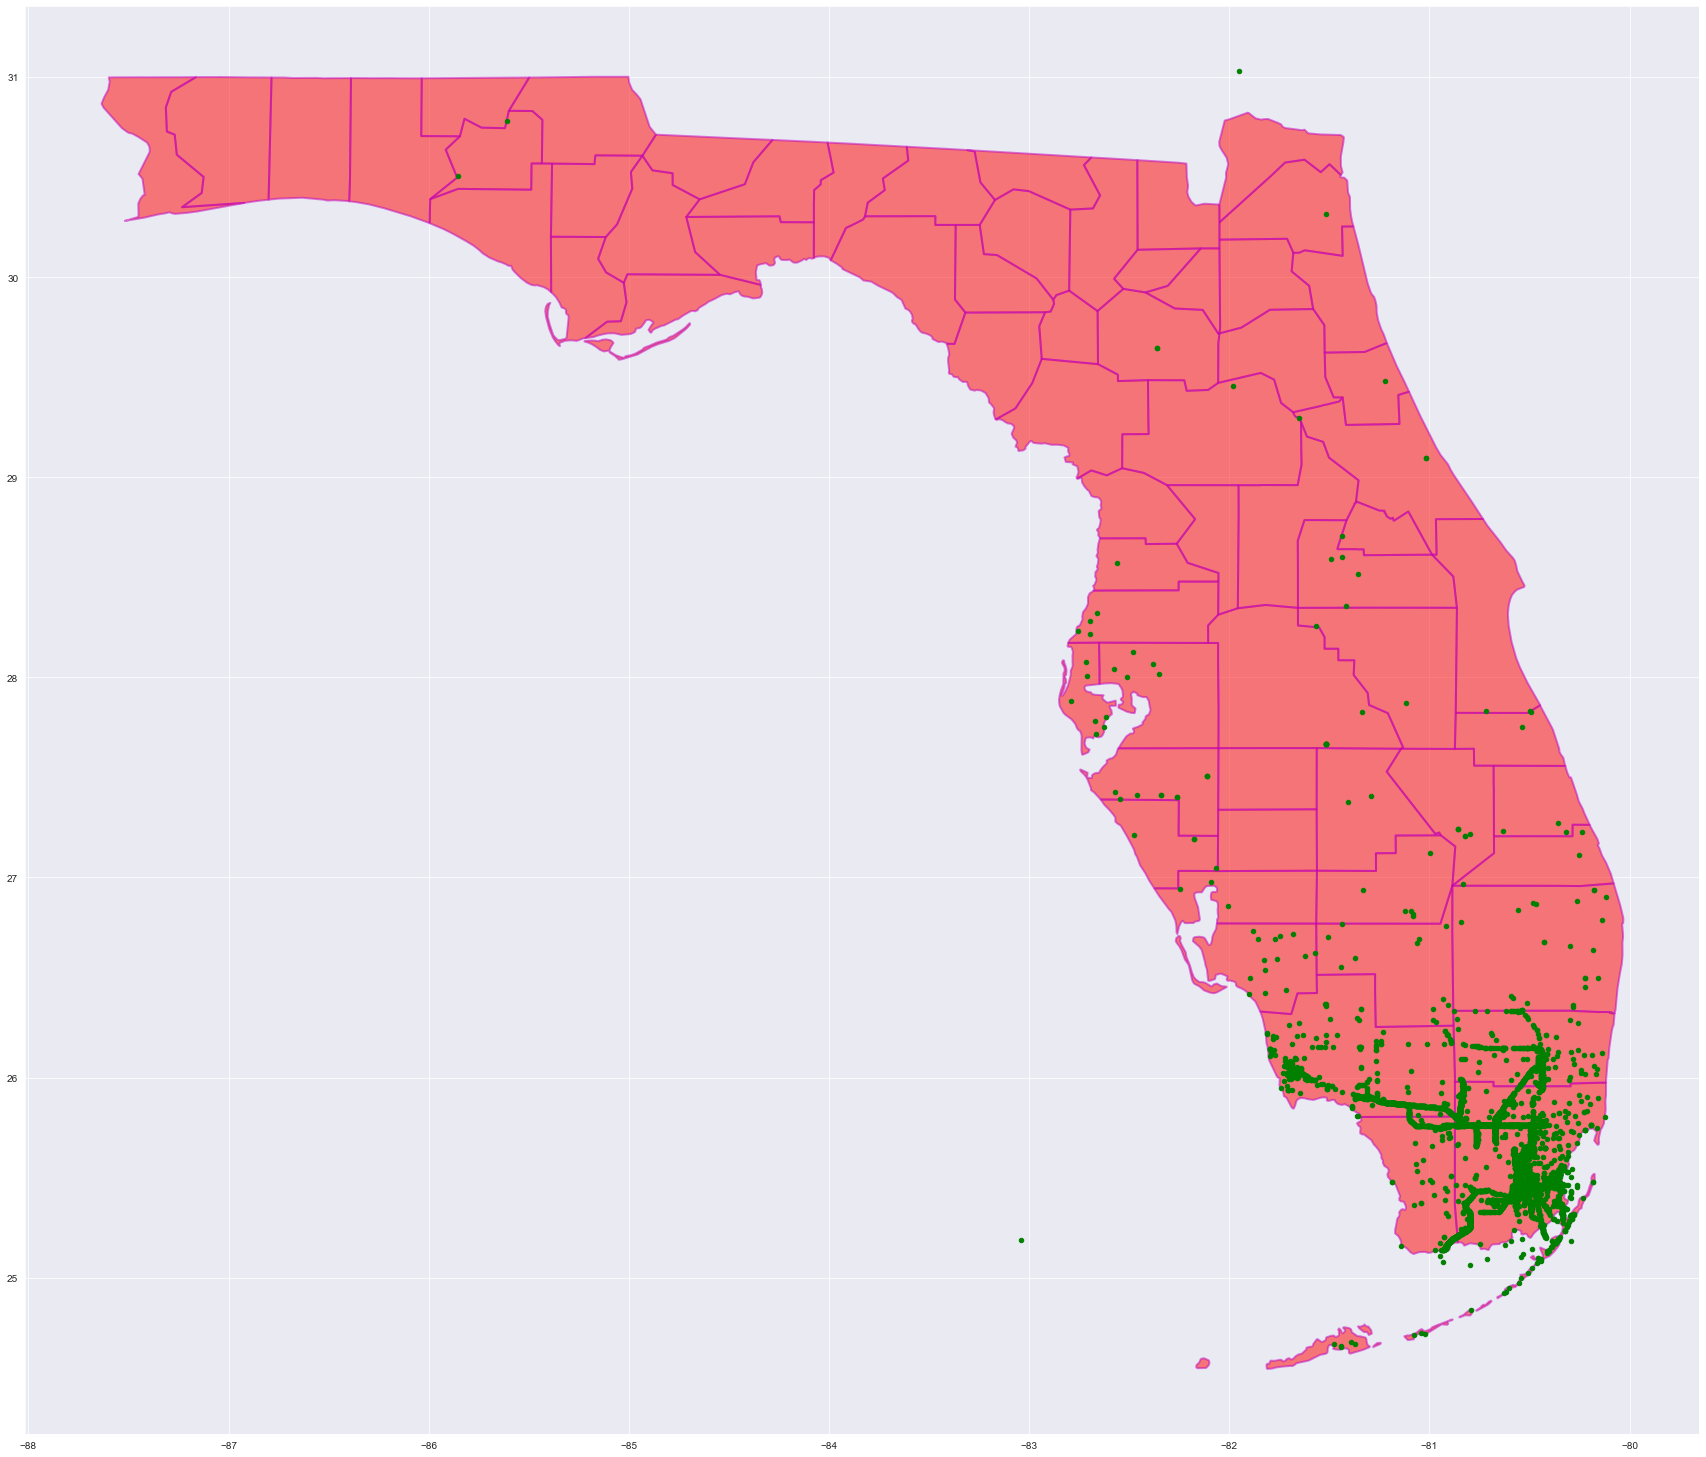

In [47]:
pre2020 = geodata.loc[(geodata['ObsDate'] >= '01/01/1979')
                     & (geodata['ObsDate'] < '01/01/2020')]


fig, ax = plt.subplots(figsize=(30,30))

counties.plot(ax=ax, facecolor='red', edgecolor='m',alpha=.5,linewidth=2)


pre2020.plot(ax=ax, color='green', markersize=20);

In [48]:
pre2020.shape

(6054, 80)

(-86.142709, -79.812671, 24.2403035, 31.3521665)

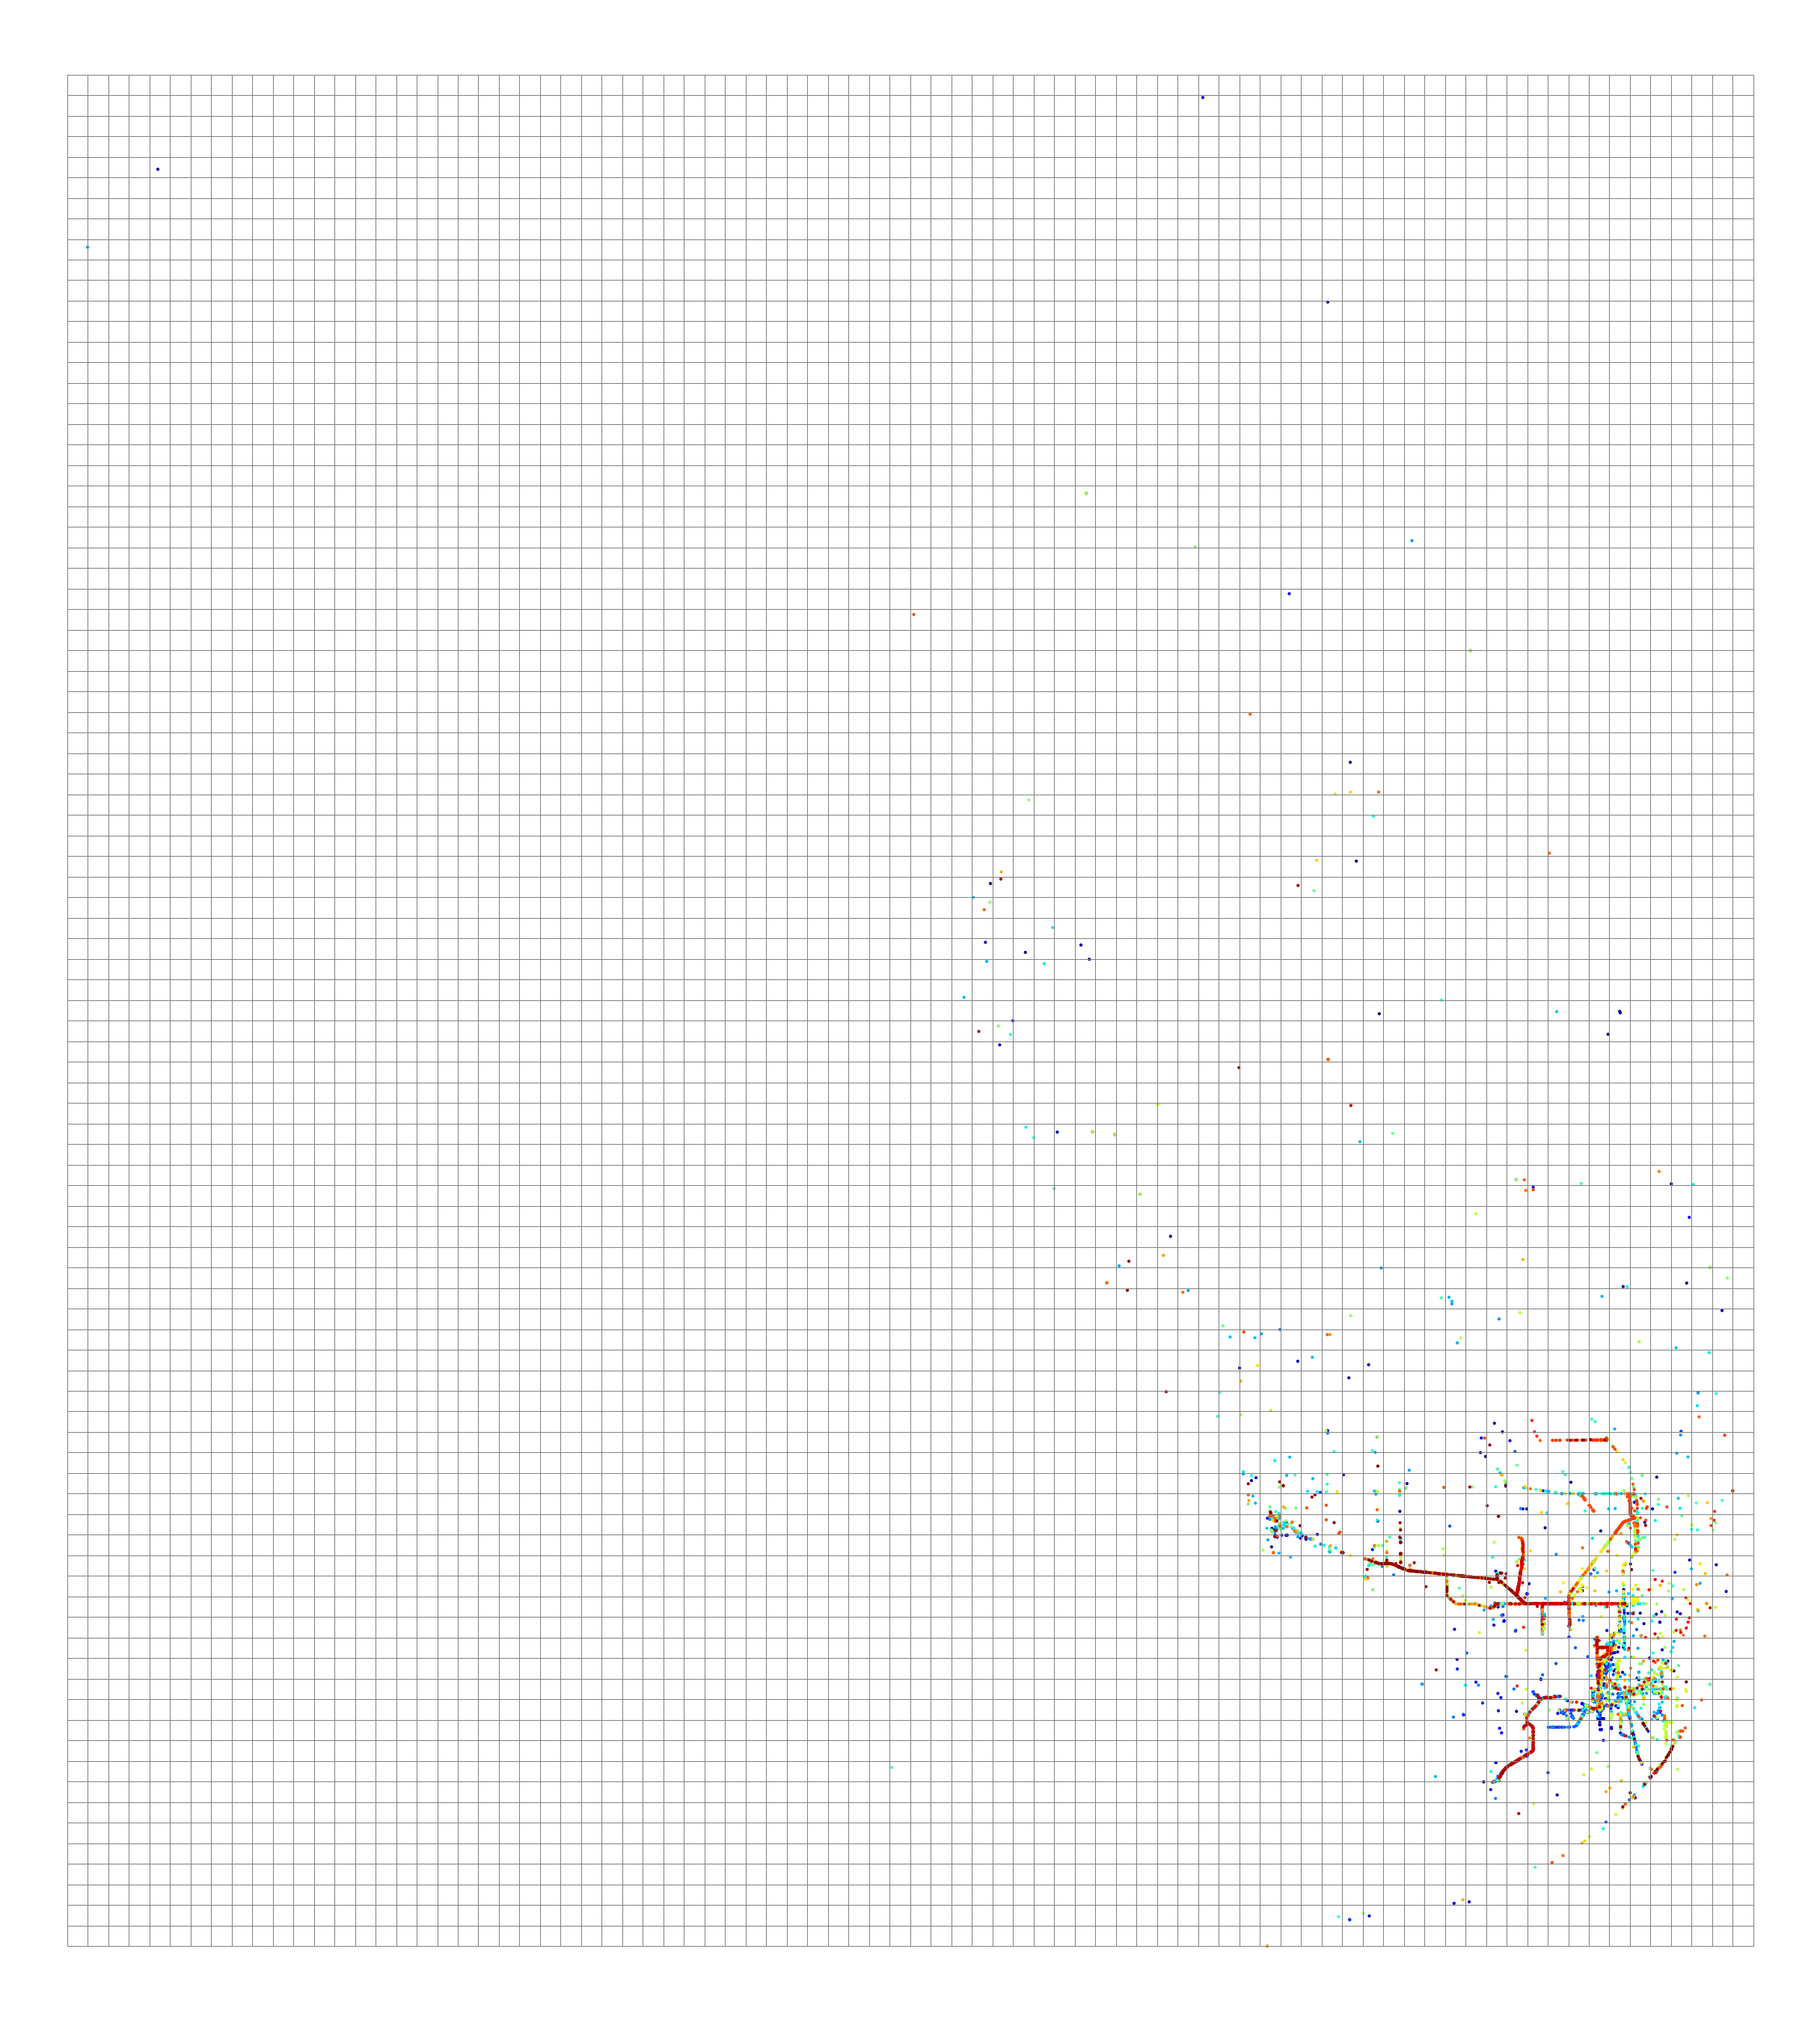

In [30]:
ax = geodata.plot(markersize=10, figsize=(50, 50), cmap='jet')
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [31]:
merged = gpd.sjoin(geodata, cell, how='left', predicate='within')

In [166]:
# make a simple count variable that we can sum
merged['pythons']=1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'pythons'] = dissolve.pythons.values


pythons
count  357.000000
mean    20.210084
std     50.460443
min      1.000000
25%      1.000000
50%      2.000000
75%      9.000000
max    392.000000

In [156]:
ax = cell.plot(column='pythons', figsize=(12, 8), cmap='viridis', vmax=5000, edgecolor="grey")
plt.autoscale(False)

In [96]:
pointdata = data_dropped[['Latitude', 'Longitude']]
pointlist = pointdata.values.tolist()
len(pointlist)

7217

In [97]:
from numpy import nan

In [98]:
my_array = pointlist

In [101]:
import pandas as pd
import requests
from xml.etree import ElementTree
import numpy as np
import folium

In [104]:
GetAllCountersUrl = "http://webservices.commuterpage.com/counters.cfc?wsdl&method=GetAllCounters"

In [105]:
xmlfile = open('xml_getallcounters.xml', 'w')
xmldata = requests.get(GetAllCountersUrl)
xmlfile.write(xmldata.text)
xmlfile.close()

xml_data = 'xml_getallcounters.xml'

In [168]:
data = data.dropna(subset=['Latitude', 'Longitude'])

In [169]:
data["Coordinates"] = gpd.points_from_xy(data["Longitude"], data["Latitude"])

C:\Users\gianl\AppData\Local\Temp/ipykernel_6868/960752008.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

